# Сегментация клиентов банка по потреблению банковских продуктов.

## Описание проекта
Для анализа предоставлены данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Необходимо произвести сегментацию клиентов банка, выделить основные целевые аудитории и охарактеризовать их ключевые признаки.

## Структура проекта
1. Изучение общей информации.
2. Предобработка данных.
- соответствие типов данных
- корректность названий столбцов
- пропущенные значения
- дубликаты
3. Исследовательский анализ данных.
- изучение средних значений и стандартных отклонений
- построим столбчатые диаграммы и распределения по основным признакам
- матрица корреляций
4. Сегментация пользователей.
5. Проверка гипотез.
6. Общий вывод.

### Шаг 1. Изучение общей информации.

Импортирование модулей, необходимых для работы

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import numpy as np
import math as mth

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore') 

Чтение данных и визуалиция таблицы 

In [2]:
data = pd.read_csv('данные предоставлены Яндекс.Практикум')
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


#### Вывод 
В начальной таблице  12 колонок: 
- `userid` - идентификатор пользователя
- `score` - баллы кредитного скоринга
- `City` - город
- `Gender` — пол
- `Age` — возраст
- `Objects` — количество объектов в собственности
- `Balance` — баланс на счете
- `Products` — количество продуктов, которыми пользуется клиент
- `CreditCard` — есть ли кредитная карта
- `Loyalty` — активный клиент
- `estimated_salary` — заработная плата клиента
- `Churn` — данные оттока - ушел или нет

Проведем обработку данных - заменим названия колонок на единый регистр, изучим тип данных, посмотрим на наличие пропущенных значений и дубликатов.

### Шаг 2. Предобработка данных.

Используем для более подробного изучения данных универсальную функцию

In [3]:
def df_view(df):
    """
    Быстрый обзор таблицы
    """
    df.rename(str.lower, axis='columns', inplace=True)
    print(df.columns)
    display(df)
    a = df.duplicated().sum()
    print(df.info())
    print()
    print('Количество дубликатов в таблице', a)

In [4]:
df_view(data)

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
city                10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
objects             10000 non-null int64
balance             6383 non-null float64
products            10000 non-null int64
creditcard          10000 non-null int64
loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Количество дубликатов в таблице 0


Для анализа имеем 10000 значений в 12 столбцах. Поменяли названия столбцов, используя единый нижний регистр, дубликатов не обнаружено. Типы данных для 8 колонок `float64` и `int64` соответствуют ожидаемым и не требуют изменений. Для двух колонок тип данных `object`. Для столбца 'gender' изменим тип с `object` на числовой `int64`.

In [5]:
data['gender'] = data['gender'].replace({'М':1, 'м':1, 'Ж':0, 'ж':0}).astype(int)
data

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,0,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,0,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,0,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,0,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,1,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,1,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,0,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,1,42,3,75075.31,2,1,0,92888.52,1


Пропуски в столбце `balance` составляют порядка 45%, это много. Нет возможности выяснить причины появления пропусков в этих данных. Возможно это остаток на дебетовой карте, а эти клиенты не имеют такой карты, т.е. эти люди пользуются другими банковскими продуктами. Заполнять пропуски не будем, потому что это может повлиять на распределение признака. 
Данные готовы к анализу.

#### Вывод 
Провели обработку данных - заменили названия колонок на единый регистр, привели данные к нужным типам, дубликатов в данных обнаружено не было. Пропущенные значения в столбце `balance` оставили без изменений, чтобы исключить искажение данных.

### Шаг 3. Исследовательский анализ данных.

Изучим средние значения данных и стандартные отклонения, используя метод `describe()`

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,10000.0,1.573368e+07,71936.186123,15608437.00,1.567126e+07,1.573347e+07,1.579597e+07,15858426.00
score,10000.0,6.505288e+02,96.653299,350.00,5.840000e+02,6.520000e+02,7.180000e+02,850.00
gender,10000.0,5.457000e-01,0.497932,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
age,10000.0,3.892180e+01,10.487806,18.00,3.200000e+01,3.700000e+01,4.400000e+01,92.00
objects,10000.0,5.012800e+00,2.892174,0.00,3.000000e+00,5.000000e+00,7.000000e+00,10.00
balance,6383.0,1.198275e+05,30095.056462,3768.69,1.001820e+05,1.198397e+05,1.395123e+05,250898.09
products,10000.0,1.530200e+00,0.581654,1.00,1.000000e+00,1.000000e+00,2.000000e+00,4.00
creditcard,10000.0,7.055000e-01,0.455840,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
loyalty,10000.0,5.151000e-01,0.499797,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,5.100211e+04,1.001939e+05,1.493882e+05,199992.48


Из полученных данных видно, что в среднем:

- раcпределение по полу примерно равное, мужчин чуть больше, чем женщин. 
- 39 лет - средний возраст клиента
- 5 объектов в собственности с среднем
- 119 000 средний баланс на карте 
- 1,5 банковских продукта приходится в среднем на 1 клиента банка
- 70% имеют кредитную карту
- 51% клиентов активны
- 100 000 средняя зарплата 
- 20% клиентов в оттоке


Посмотрим на распределение клиентов и отличие их по городам.

In [7]:
city = data.groupby('city').agg({'userid': 'count', 'products':'mean'})
city['fraction'] = city['userid'] / city['userid'].sum()
display(city)

,userid,products,fraction
city,,,
Ростов Великий,2509,1.519729,0.2509
Рыбинск,2477,1.539362,0.2477
Ярославль,5014,1.530913,0.5014


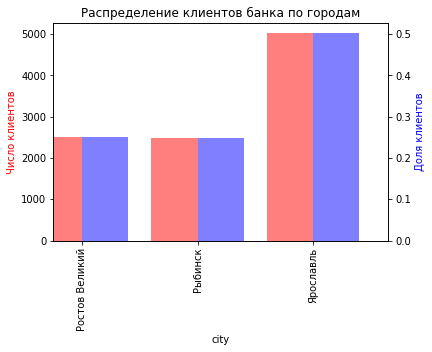

In [8]:
fig, axs = plt.subplots()
ax2 = axs.twinx()
city['userid'].plot(kind='bar', alpha=0.5, ax=axs, color='red', position=1, width=0.4)
city['fraction'].plot(kind='bar', alpha=0.5, ax=ax2, color='blue', position=0, width=0.4)
axs.set_ylabel('Число клиентов', color='red')
ax2.set_ylabel('Доля клиентов', color='blue') 
plt.title('Распределение клиентов банка по городам')
plt.show()

Из графика видно, что 50% клиентов из анализируемых данных находятся в Ярославле, где находится головной офис банка. В городах Ростов Великий и Рыбинск доля клиентов примерно равная, около 25%. Город не влияет на среднее количество использования банковских продуктов.

In [9]:
data.drop(['userid'], axis=1).groupby('city').mean().T

city,Ростов Великий,Рыбинск,Ярославль
score,651.453567,651.333872,649.668329
gender,0.524512,0.560355,0.549063
age,39.771622,38.890997,38.511767
objects,5.009964,5.032297,5.004587
balance,119730.116134,119814.985923,119927.765597
products,1.519729,1.539362,1.530913
creditcard,0.713830,0.694792,0.706621
loyalty,0.497409,0.529673,0.516753
estimated_salary,101113.435102,99440.572281,99899.180814
churn,0.324432,0.166734,0.161548


Если сравнивать признаки по городам, то большинство признаков сходны между собой. Однако, в Ростове Великом отток клиентов 32%, что гораздо выше, чем в Рыбинске и Ярославле. Соответственно в этом городе и ниже показатель активности клиентов. Поскольку Ростов Великий по численности населения уступает Ярославлю и Рыбинску необходимо понять, чем вызваны такие большие показатели оттока. Возможно есть какие-то проблемы с сотрудниками отделения банка или неточности в данных.

In [10]:
data[data['balance'].isna()].groupby('city').mean()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
city,,,,,,,,,,,
Рыбинск,1.573551e+07,651.685571,0.545455,38.496247,5.085071,NaN,1.791493,0.710592,0.511259,98708.617389,0.135947
Ярославль,1.573428e+07,648.345740,0.541356,38.404467,5.064516,NaN,1.781224,0.719603,0.521092,99119.893565,0.139371


Интересно отметить, что в Ростове Великом не обнаружены клиенты с пропусками в данных `balance`. Это может говорить о неполных данных, особенностях сбора информации и особенностях обслуживания в городах.

Посмотрим на распределение клиентов по полу.

In [11]:
gender = data.groupby('gender').agg({'userid':'count', 'products':'mean'})
gender['fraction'] = gender['userid'] / gender['userid'].sum()
gender

,userid,products,fraction
gender,,,
0,4543,1.544134,0.4543
1,5457,1.518600,0.5457


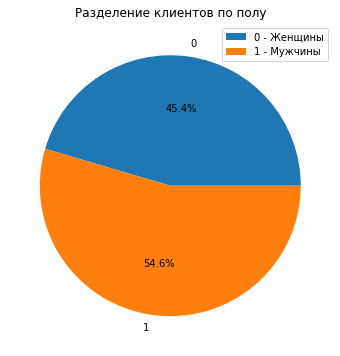

In [12]:
gender.plot.pie(y='fraction', label='', autopct='%.1f%%', figsize=(8,6), legend=True)
plt.title('Разделение клиентов по полу')
plt.legend(['0 - Женщины', '1 - Мужчины'])
plt.show()

Мужчин среди клиентов банка почти на 10% больше, чем женщин, при этом пол практически не влияет на количество использования банковских продуктов.

Построим гистограммы и распределения для признаков пользователей по банковским продуктам.

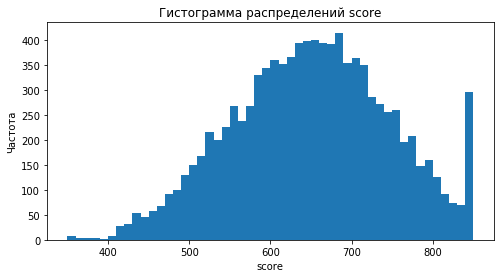

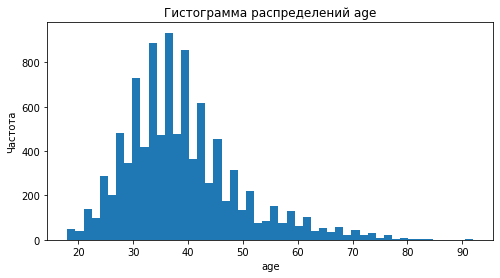

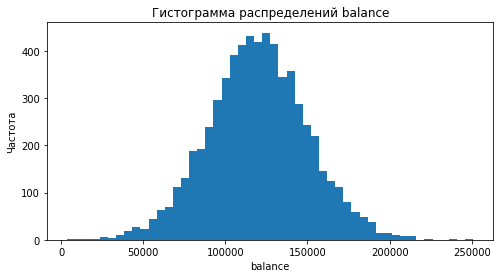

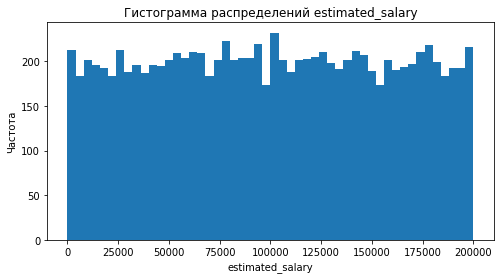

In [13]:
float_feature = ['score', 'age', 'balance', 'estimated_salary']

for i in float_feature:
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.hist(data[i], bins=50)
    ax.set_title('Гистограмма распределений '+i)
    ax.set_xlabel(i)
    ax.set_ylabel('Частота')
    plt.show()

Признаки `score`, `age`(скошены вправо, основной возраст клиентов больше 30 лет) и `balance` имеют нормальное распределение. Пик на гистограмме для `score` может быть вызван технической ошибкой.
Для данных заработной платы `estimated_salary` распределение не похоже на нормальное( в диапазоне от 0 до 200000 клиенты распределены практически равномерно) - это может быть связано с тем, что данные представляют собой не фактическую заработную плату, а расчетную по историям трат клиента. Необходимо уточнить этот момент у заказчика.
Большая часть клиентов пользуется 1 и 2 банковскими продуктами. Доля тех, кто использует 3 и 4 продукта незначительна.

Построим столбчатые диаграммы для дискретных признаков

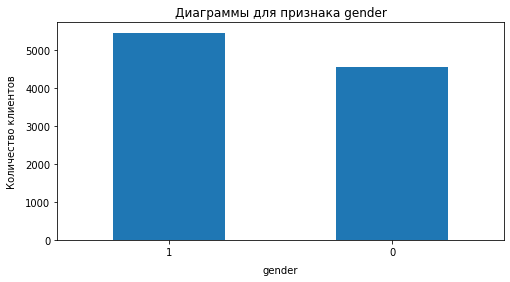

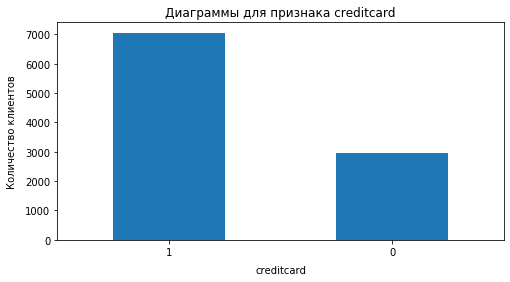

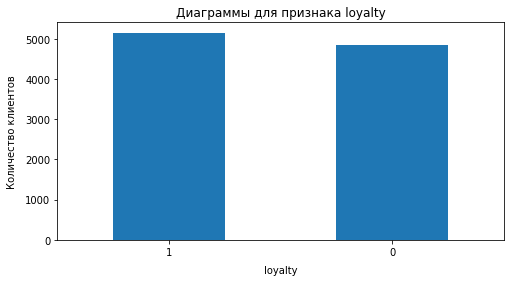

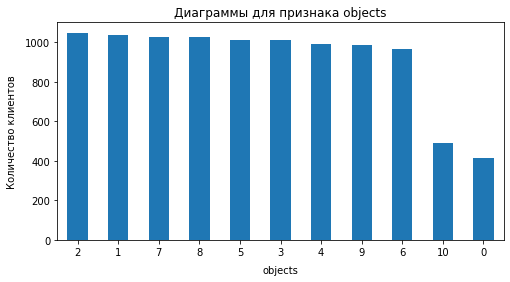

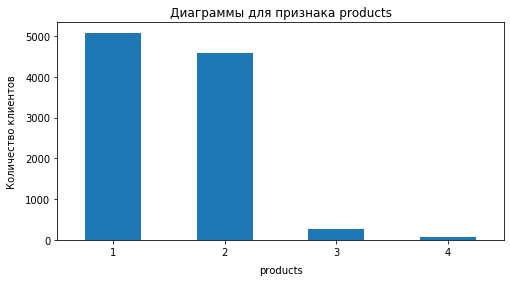

In [14]:
discrete_feature = ['gender', 'creditcard', 'loyalty', 'objects', 'products']

for i in discrete_feature:
    data[i].value_counts().plot(kind='bar', figsize=(8, 4), rot=0)
    plt.xlabel(i, labelpad=8)
    plt.ylabel('Количество клиентов', labelpad=8)
    plt.title('Диаграммы для признака '+i)
    plt.show()

Построим матрицу корреляций, отобразим ее на тепловой карте.

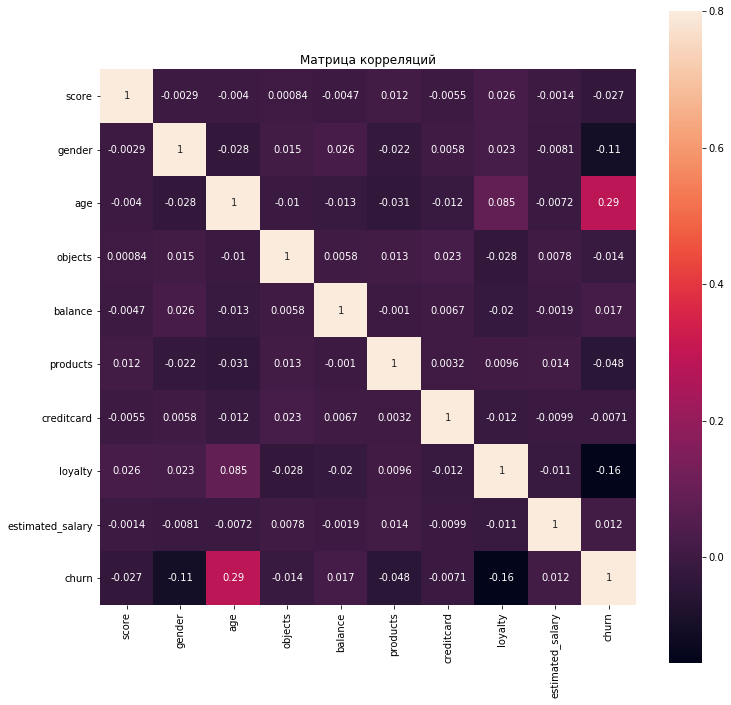

In [15]:
corr_m = data.drop(['userid'], axis=1).corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_m, square=True, vmax=0.8, annot=True)
plt.title('Матрица корреляций')
plt.show()

Судя по матрице корреляций, нет явной зависимости между какими-либо признаками.
На использование банковских продуктов в большей степени из всех влияет наличие кредитной карты, что и логично, поскольку сама карта и яляется одним из банковских продуктов.
И есть небольшая зависимосить оттока клиентов от возраста.

#### Вывод 
Из полученных данных видно, что в среднем:

- мужчин на 10% больше, чем женщин. 
- 39 лет - средний возраст клиента
- 5 объектов в собственности 
- 1,5 банковских продукта приходится на 1 клиента банка
- 70% имеют кредитную карту
- 20% клиентов в оттоке

50% клиентов из анализируемых данных находятся в Ярославле, где находится головной офис банка. В городах Ростов Великий и Рыбинск доля клиентов примерно равная, около 25%. При этом в Ростове Великом отток клиентов 32%, что гораздо выше, чем в Рыбинске и Ярославле. 
Мужчин среди клиентов банка почти на 10% больше, чем женщин, при этом пол практически не влияет на количество использования банковских продуктов.
Признаки `score`, `age`(скошены вправо, основной возраст клиентов больше 30 лет) и `balance` имеют нормальное распределение.
Большая часть клиентов пользуется 1 и 2 банковскими продуктами. Доля тех, кто использует 3 и 4 продукта незначительна.

Судя по матрице корреляций, нет явной зависимости между какими-либо признаками.
На использование банковских продуктов в большей степени из всех влияет наличие кредитной карты, что и логично, поскольку сама карта и яляется одним из банковских продуктов.

### Шаг 4. Сегментация пользователей.

Сегментируем пользователей на основе данных о количестве используемых продуктов.

Посмотрим на средние значения признаков для групп пользователей по потреблению банковских продуктов.

In [16]:
data.drop(['userid'], axis=1).groupby('products').mean().T

products,1,2,3,4
score,649.120968,652.188671,648.105263,653.583333
gender,0.548387,0.551198,0.439850,0.366667
age,39.673092,37.753595,43.195489,45.683333
objects,4.974626,5.051852,5.003759,5.300000
balance,119894.163723,119660.944362,119475.686310,122260.610870
creditcard,0.703777,0.707190,0.714286,0.683333
loyalty,0.504131,0.532898,0.424812,0.483333
estimated_salary,99487.256851,100452.012821,104318.130564,104763.723333
churn,0.277144,0.075817,0.827068,1.000000


В разбивке по продуктам можно выделить следующие отличия в группах пользователей:

1 продукт:
- преимущественно мужчины
- меньше, чем у остальных клиентов объектов в собственности
- показатель оттока 27%

2 продукта:
- преимущественно мужчины
- самая высокая активность клиентов 
- самый низкий отток 7,2%

3 продукта:
- преимущественно женщины
- самый высокий процент наличия кредитной карты
- самая низкая активность клиентов
- высокий отток 82%

4 продукта:
- подавляющее большиство женщины
- самая возрастная группа клиентов
- больше всего объектов в собственности
- реже других имеют кредитную карту
- 100% отток

Можно предположить, что клиенты,  пользующиеся 1-2 продуктами - это активные клиенты банка,  имеющие кредитную и/или дебетовую карту. Поскольку в группе с 2 продуктами отток самый низкий, рекомендация для банка работать больше с этой группой клиентов и стараться переводить клиентов с 1 продукта на 2.
Клиенты с 3-4 продуктами - люди более зрелого возраста, имеющие накопления и достаточное количество объектов в собственности используют банковские продукты, чтобы обезопасить себя и увеличить накопления (страховки, инвестиционные счета).Большая доля оттоков в этих группах может быть связана с кредитами, ипотеками после возвращения которых люди перестают быть клиентами банка.

In [17]:
products = data.groupby('products').agg({'userid': 'nunique'})
products['fraction'] = products['userid'] / products['userid'].sum()
products

,userid,fraction
products,,
1,5084,0.5084
2,4590,0.4590
3,266,0.0266
4,60,0.0060


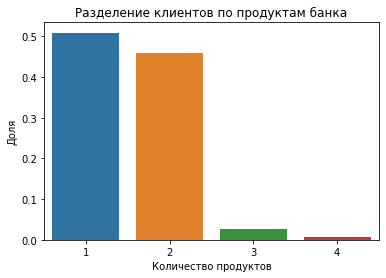

In [18]:
ax = sns.barplot(x=products.index, y='fraction', data=products)
plt.title('Разделение клиентов по продуктам банка')
plt.xlabel('Количество продуктов')
plt.ylabel('Доля')
plt.show()

Преимущественное число клиентов пользуется 1-2 продуктами. 3 продукта используют только 2,6% пользователей, а 4 - всего 0,6%.

Проведем кластеризацию пользователей

Стандартизируем данные и построим матрицу расстояний - нарисуем дендрограмму.

Удалим оставшийся категориальный признак, подготовим датасет. Присвоим значений 0 - Ярославль, 1 - Рыбинск, 2 - Ростов Великий.

In [19]:
data['city_int'] = data['city'].replace({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2}).astype(int)

In [20]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop(columns=['products', 'city', 'userid'], axis=1)
X = X[X['balance'].notna()]
y = data['products']

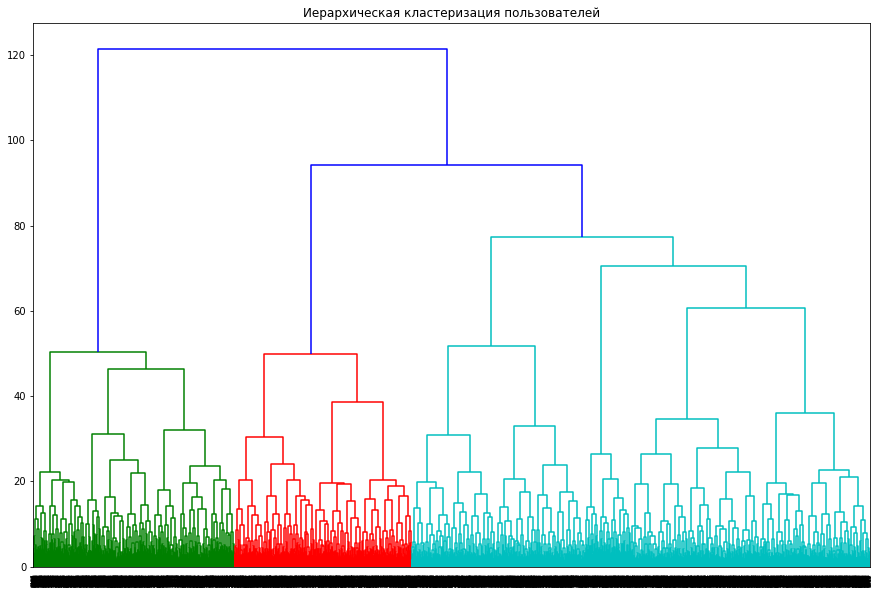

In [21]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(X) 

linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация пользователей')
plt.show() 

 Судя по дендрограмме, предложенное оптимальное число кластеров равно 3. Самый многочисленный содержит в себе 3 группы.

Обучим модель кластеризации на основании алгоритма `K-Means`. Возьмем число кластеров n=3.

In [22]:
km = KMeans(n_clusters = 3, random_state=0)
X['cluster'] = km.fit_predict(X_sc)
cluster_mean = X.groupby('cluster').agg(['mean']).droplevel(1, axis=1)
cluster_mean

,score,gender,age,objects,balance,creditcard,loyalty,estimated_salary,churn,city_int
cluster,,,,,,,,,,
0,645.959740,0.447403,44.866883,4.977273,120731.921545,0.698052,0.36039,101310.844182,0.998052,1.223377
1,649.433019,0.567925,35.539151,5.125943,120385.897189,0.701887,0.00000,101337.961269,0.000000,0.895283
2,655.395152,0.587954,38.839882,4.867058,118881.245560,0.697760,1.00000,99898.525887,0.000000,0.923246


У нас есть 3 портрета пользователей, исходя из использования ими продуктов банка.

Кластер 0:
 - практически 100% отток - это покинувшие банк пользователи
 - преобладают женщины
 - средний возраст 44-45 лет
 - активны 36% пользователей

Кластер 1: 
- нулевой отток - это действующие клиенты банка
- активные пользователи продуктов
- с бОльшим количеством собственности
- преобладают мужчины
- средний возраст 35 лет

Кластер 2:
- нулевой отток - это действующие клиенты банка
- неактивные пользователи
- преобладают мужчины
- средний возраст 38-39 лет

В принципе в основе разделения в последних двух кластерах лежит активность клиента - пользуется он продуктами банка или нет. Остальные признаки существенного влияния не оказывают.

Чтобы убедится в этом построим распределение признаков по кластерам.


Диаграмма по кластерам для признака churn


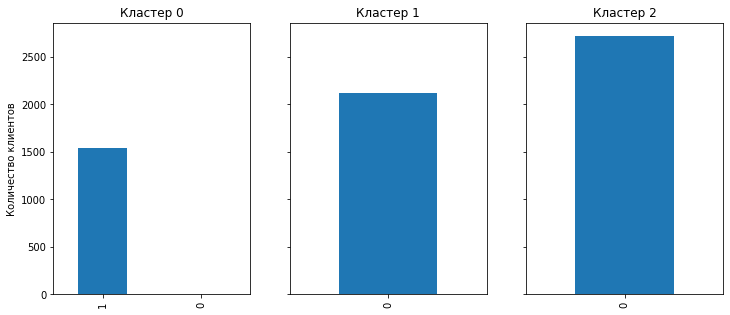


Диаграмма по кластерам для признака loyalty


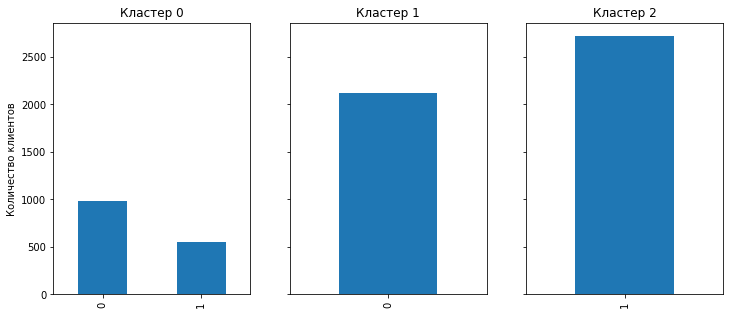


Диаграмма по кластерам для признака gender


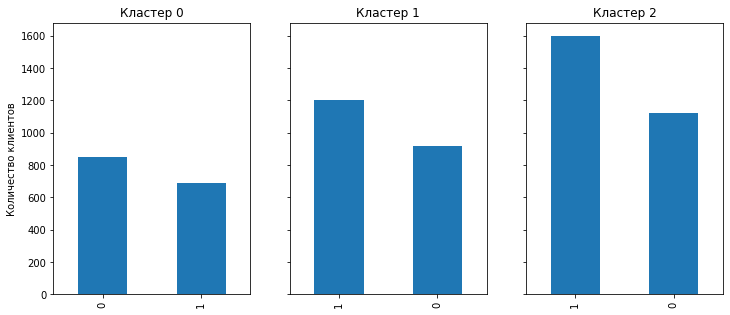

In [23]:
parameters = ['churn', 'loyalty', 'gender']

for i in parameters:
    print('\nДиаграмма по кластерам для признака {}'.format(i))
    fig, ax = plt.subplots(1, 3, figsize=(12,5), sharey=True)
    
    for c in range(3):
        X.query('cluster == @c')[i].value_counts().plot(kind='bar', ax=ax[c])
        
        
    ax[0].set_title('Кластер 0')
    ax[1].set_title('Кластер 1')
    ax[2].set_title('Кластер 2')
        
    ax[0].set(ylabel = 'Количество клиентов')
    plt.show()

#### Вывод 

В разбивке по продуктам можно выделить следующие отличия в группах пользователей:

1 продукт:
- преимущественно мужчины
- меньше, чем у остальных клиентов объектов в собственности
- показатель оттока 27%

2 продукта:
- преимущественно мужчины
- самая высокая активность клиентов 
- самый низкий отток 7,2%

3 продукта:
- преимущественно женщины
- самый высокий процент наличия кредитной карты
- самая низкая активность клиентов
- высокий отток 82%

4 продукта:
- подавляющее большиство женщины
- самая возрастная группа клиентов
- больше всего объектов в собственности
- реже других имеют кредитную карту
- 100% отток

Можно предположить, что клиенты,  пользующиеся 1-2 продуктами - это активные клиенты банка,  имеющие кредитную и/или дебетовую карту. Поскольку в группе с 2 продуктами отток самый низкий, рекомендация для банка работать больше с этой группой клиентов и стараться переводить клиентов с 1 продукта на 2.
Клиенты с 3-4 продуктами - люди более зрелого возраста, имеющие накопления и достаточное количество объектов в собственности используют банковские продукты, чтобы обезопасить себя и увеличить накопления (страховки, инвестиционные счета).Большая доля оттоков в этих группах может быть связана с кредитами, ипотеками после возвращения которых люди перестают быть клиентами банка.

Преимущественное число клиентов пользуется 1-2 продуктами. 3 продукта используют только 2,6% пользователей, а 4 - всего 0,6%.

Стандартизировали данные, получили 3 кластера по клиентам:
Кластер 0:
 - практически 100% отток - это покинувшие банк пользователи
 - преобладают женщины
 - средний возраст 44-45 лет
 - активны 36% пользователей

Кластер 1: 
- нулевой отток - это действующие клиенты банка
- активные пользователи продуктов
- с бОльшим количеством собственности
- преобладают мужчины
- средний возраст 35 лет

Кластер 2:
- нулевой отток - это действующие клиенты банка
- неактивные пользователи
- преобладают мужчины
- средний возраст 38-39 лет

В принципе в основе разделения в последних двух кластерах лежит активность клиента - пользуется он продуктами банка или нет. Остальные признаки существенного влияния не оказывают.

### Шаг 5. Проверка гипотез.

###### Гипотеза 1
Нулевая гипотеза - нет статистически значимого различия доходов между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
Альтернативная гипотеза - доходы между клиентами, которые пользуются одним продуктом и двумя, отличаются.

Распределение `estimated_salary` ненормальное, судя по гистограмме. Но все равно проверим его на нормальность, используя критерий Шарипо-Уилка. Убедились в том, что распределение не является нормальным. Следовательно мы должны использовать непараметрический тест, основанный на структурном подходе. Используем тест Манна-Уитни к полученным выборкам.
Приняла за статистическую значимость 0.05 поскольку считаю, что такой точности достаточно при анализа. У нас не такие большие размеры выборок, следовательно, можно взять большую вероятность ошибки первого рода. При увеличении объема выборки случайные отклонения компенсируют друг друга, и получить значимое различие в выборках при их однородности менее вероятно. Следовательно, тогда надо брать меньший уровень значимости. 
Использовала двусторонний тест.

In [24]:
product1 = data.query('products == 1')['estimated_salary']
product2 = data.query('products == 2')['estimated_salary']

In [25]:
alpha = 0.05

results = st.shapiro(product1) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  3.017243029368968e-36
распределение не нормально


In [26]:
alpha = 0.05

results = st.shapiro(product2) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  2.1702207154579243e-35
распределение не нормально


In [27]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(product1, product2, alternative = 'two-sided')[1]))

p-value 0.408


Показатель p-value 0.408 > 0.05. Значит, нулевую гипотезу о том, что нет статистически значимого различия доходов между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, мы не отвергаем.

###### Гипотеза 2
Нулевая гипотеза: Женщины и мужчины оформляют в среднем одинаковое количество продуктов.
Альтернативная гипотеза: Женщины и мужчины оформляют в среднем разное количество продуктов.

In [28]:
women_products = data.query('gender == 0')['products']
men_products = data.query('gender == 1')['products']

In [29]:
alpha = 0.05

results = st.shapiro(women_products) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  0.0
распределение не нормально


In [30]:
alpha = 0.05

results = st.shapiro(men_products) 
p_value = results[1] 
print('p-значение: ', p_value)

if p_value < alpha:
    print('распределение не нормально') 
   
else:
    print('нормальное распределение')

p-значение:  0.0
распределение не нормально


In [31]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(women_products, men_products, alternative = 'two-sided')[1]))

p-value 0.199


Показатель p-value 0.199 > 0.05. Значит, нулевую гипотезу о том, что нет статистически значимой разницы между покупкой продуктов женщинами и мужчинами, мы подтверждаем.

###### Гипотеза 3
Нулевая гипотеза: Отток клиентов в группах с 1 и 2 продуктами одинаковый. Альтернативная гипотеза: Отток в группах с 1 и 2 продуктами различается. 

In [32]:
product11 = data.query('products == 1')['churn']
product12 = data.query('products == 2')['churn']

В качестве критерия статистического сравнения долей между группами будем использовать z-тест.

In [33]:
trials = np.array([len(data.query('products == 1')), len(data.query('products == 2'))]) 
successes = np.array([len(data.query('products == 1 and churn == 1')), len(data.query('products == 2 and churn == 1'))])

p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]

p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))


distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.0
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - отток клиентов в группах с одним и двумя продуктами различается.

#### Вывод 
Провели статистическую проверку гипотез. 
Выявили, что нет разницы в доходах между теми клиентами, которые пользуются двумя банковскими продуктами и теми, кто пользуется одним. При этом есть разница в оттоке у этих клиентов. Также нет статистической разницы в количестве оформляемых продуктов между мужчинами и женщинами.

### Шаг 6. Общий вывод.

Провели обработку данных перед анализом - привели названия колонок к единому регистру, изучили типы данных колонок, они соответствуют ожидаемым и не требуют изменений. Дубликатов не обнаружено, пропущенные значения в столбце `balance` оставили без изменений, чтобы исключить искажение данных.

Из полученных данных видно, что в среднем:

- мужчин на 10% больше, чем женщин. 
- 39 лет - средний возраст клиента
- 5 объектов в собственности 
- 1,5 банковских продукта приходится на 1 клиента банка
- 70% имеют кредитную карту
- 20% клиентов в оттоке

50% клиентов из анализируемых данных находятся в Ярославле, где находится головной офис банка. В городах Ростов Великий и Рыбинск доля клиентов примерно равная, около 25%. При этом в Ростове Великом отток клиентов 32%, что гораздо выше, чем в Рыбинске и Ярославле. 

Судя по матрице корреляций, нет явной зависимости между какими-либо признаками.
На использование банковских продуктов в большей степени из всех влияет наличие кредитной карты, что и логично, поскольку сама карта и яляется одним из банковских продуктов.


В разбивке по продуктам можно выделить следующие отличия в группах пользователей:

1 продукт:
- преимущественно мужчины
- меньше, чем у остальных клиентов объектов в собственности
- показатель оттока 27%

2 продукта:
- преимущественно мужчины
- самая высокая активность клиентов 
- самый низкий отток 7,2%

3 продукта:
- преимущественно женщины
- самый высокий процент наличия кредитной карты
- самая низкая активность клиентов
- высокий отток 82%

4 продукта:
- подавляющее большиство женщины
- самая возрастная группа клиентов
- больше всего объектов в собственности
- реже других имеют кредитную карту
- 100% отток

Можно предположить, что клиенты,  пользующиеся 1-2 продуктами - это активные клиенты банка,  имеющие кредитную и/или дебетовую карту. Поскольку в группе с 2 продуктами отток самый низкий, рекомендация для банка работать больше с этой группой клиентов и стараться переводить клиентов с 1 продукта на 2.
Клиенты с 3-4 продуктами - люди более зрелого возраста, имеющие накопления и достаточное количество объектов в собственности используют банковские продукты, чтобы обезопасить себя и увеличить накопления (страховки, инвестиционные счета).Большая доля оттоков в этих группах может быть связана с кредитами, ипотеками после возвращения которых люди перестают быть клиентами банка.

Преимущественное число клиентов пользуется 1-2 продуктами. 3 продукта используют только 2,6% пользователей, а 4 - всего 0,6%.

Стандартизировали данные, получили 3 кластера по клиентам:
Кластер 0:
 - практически 100% отток - это покинувшие банк пользователи
 - преобладают женщины
 - средний возраст 44-45 лет
 - активны 36% пользователей

Кластер 1: 
- нулевой отток - это действующие клиенты банка
- активные пользователи продуктов
- с бОльшим количеством собственности
- преобладают мужчины
- средний возраст 35 лет

Кластер 2:
- нулевой отток - это действующие клиенты банка
- неактивные пользователи
- преобладают мужчины
- средний возраст 38-39 лет

В принципе в основе разделения в последних двух кластерах лежит активность клиента - пользуется он продуктами банка или нет. Остальные признаки существенного влияния не оказывают.

Провели статистическую проверку гипотез. 
Выявили, что нет разницы в доходах между теми клиентами, которые пользуются двумя банковскими продуктами и теми, кто пользуется одним. При этом есть разница в оттоке у этих клиентов. Также нет статистической разницы в количестве оформляемых продуктов между мужчинами и женщинами.

Рекомендации:
- Увеличивать активность клиентов, привлекать их к использованию продуктов банка.
- Предлагать дополнительные продукты клиентам с одним продуктом. Высока вероятность со стороны клиента приобрести второй продукт и доля оттока  в этой группе ниже.
- Поддерживать активность и клиентов с двумя продуктами. Уведомлять об акциях, спецпредложениях по кредитной/дебетовой карте, рефинансированию.
- Клиенты с тремя продуктами и 4 продуктами больше других склонны к оттоку. Взаимодействовать постоянно с такими клиентами.
- Выяснить причины высокого оттока в городе Ростов Великий.

Презентация https://cloud.mail.ru/public/av5a/6PpGNmjLu

Дашборд https://public.tableau.com/app/profile/tatyana.poter/viz/__16250845517020/Dashboard1